In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()

#load:
aircraft_crashes = pd.read_csv("aircraft_crashes.csv")

First rows:

In [3]:
aircraft_crashes.head(4)

,date,time,location,operator,flight_number,route,type,registration,id,aboard,fatalities,ground_fatalities,summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...


In [4]:
aircraft_crashes.columns

Index(['date', 'time', 'location', 'operator', 'flight_number', 'route',
       'type', 'registration', 'id', 'aboard', 'fatalities',
       'ground_fatalities', 'summary'],
      dtype='object')

First row:

In [5]:
row_one = aircraft_crashes.iloc[0]
row_one

date                                                        09/17/1908
time                                                             17:18
location                                           Fort Myer, Virginia
operator                                          Military - U.S. Army
flight_number                                                      NaN
route                                                    Demonstration
type                                                  Wright Flyer III
registration                                                       NaN
id                                                                   1
aboard                                                             2.0
fatalities                                                         1.0
ground_fatalities                                                  0.0
summary              During a demonstration flight, a U.S. Army fly...
Name: 0, dtype: object

In [6]:
aircraft_crashes['fatalities']

0         1.0
1         5.0
2         1.0
3        14.0
4        30.0
        ...  
5263     98.0
5264      4.0
5265    228.0
5266      1.0
5267     13.0
Name: fatalities, Length: 5268, dtype: float64

Text(0, 0.5, 'Frequency')

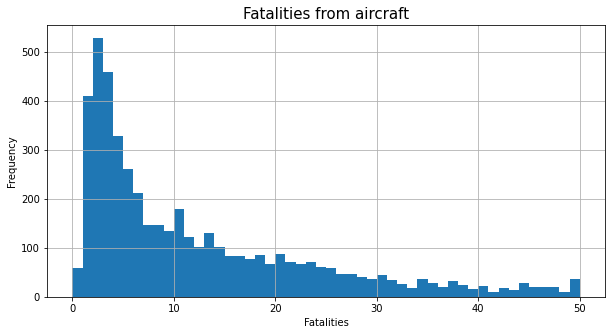

In [7]:
aircraft_crashes.fatalities[aircraft_crashes.fatalities <= 50].hist(bins=50)
plt.title("Fatalities from aircraft", fontsize=15)
plt.xlabel('Fatalities', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

The above histogram shows that most recorded crashes only involve a few deaths with the most common being 2. Many small aircraft have 2 seat configurations and it is common for pilots to fly only with a passenger / co-pilot.

Text(0, 0.5, 'Frequency')

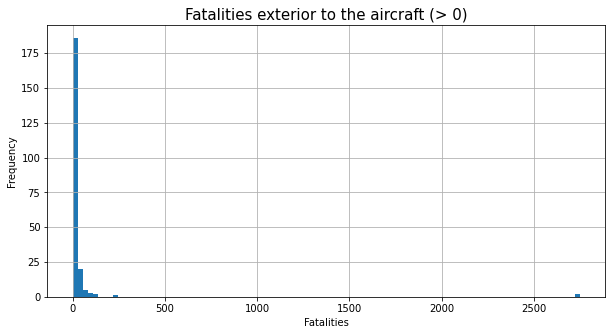

In [8]:
aircraft_crashes.ground_fatalities[aircraft_crashes.ground_fatalities > 0].hist(bins=100)
plt.title("Fatalities exterior to the aircraft (> 0)", fontsize=15)
plt.xlabel('Fatalities', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

Something to note is that there is an anomaly on this graph where over 2500 fatalities were recorded in a single incident. Want to guess at what this is?

It's the September 11 attacks.

Text(0, 0.5, 'Frequency')

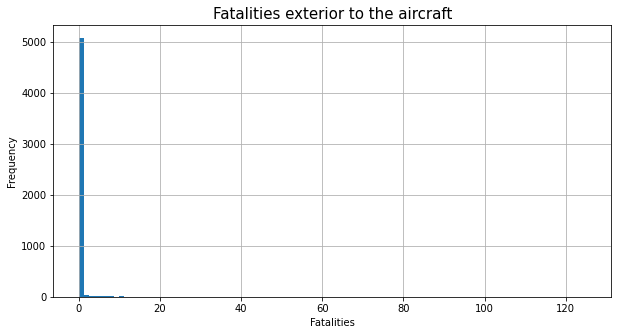

In [9]:
aircraft_crashes.ground_fatalities[aircraft_crashes.ground_fatalities < 200].hist(bins=100)
plt.title("Fatalities exterior to the aircraft", fontsize=15)
plt.xlabel('Fatalities', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

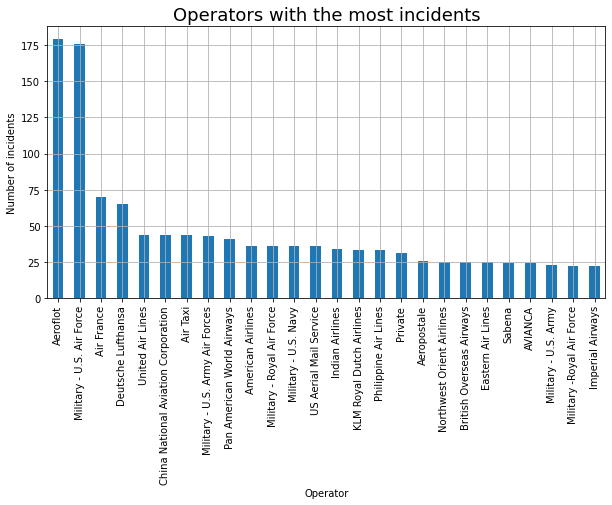

In [10]:
operator = aircraft_crashes['operator'].value_counts()
operator[operator >= 20].plot(kind='bar')
plt.title("Operators with the most incidents", fontsize=18)
plt.xlabel('Operator', fontsize=10)
plt.ylabel('Number of incidents', fontsize=10)
plt.grid(True)
plt.show()

Here are the operators with the most incidents with counts less than 20 not included. Aeroflot (a Russian airline) is at the top, though it isn't too surprising to me since I already were aware of that history (there are multiple Wikipedia pages listing this!). What I didn't know was that a lot of incidents involve the US military in some way.

It is notable that Air Taxi and Private are listed here. Air Taxi refers in general to airplane taxis. It is not clear what Private really refers to.

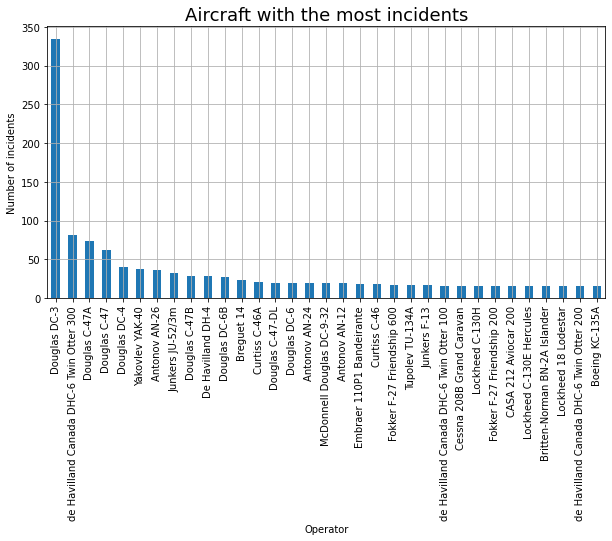

In [12]:
operator = aircraft_crashes['type'].value_counts()
operator[operator >= 15].plot(kind='bar')
plt.title("Aircraft with the most incidents", fontsize=18)
plt.xlabel('Operator', fontsize=10)
plt.ylabel('Number of incidents', fontsize=10)
plt.grid(True)
plt.show()

The DC-3 happens to involve the most incidents. It is quite an old airplane (introduced 85 years ago!) which makes sense why this is the case - the combination of a long time in service and less advanced technology.

<img src="dc3.jpg">



Image credit: "restored Douglas DC-3 in flight" by Towpilot. CC BY-SA 3.0

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: date, Length: 5268, dtype: datetime64[ns]


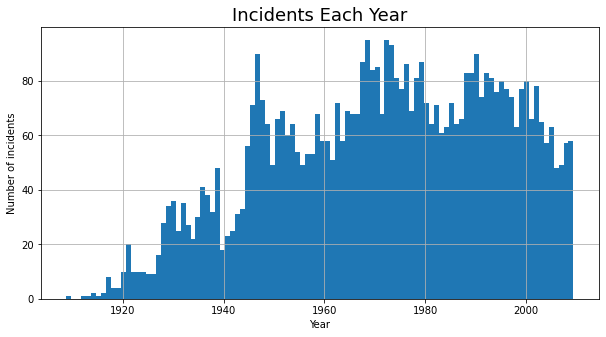

In [30]:
data = aircraft_crashes['date'].value_counts()
date = pd.to_datetime(aircraft_crashes['date'], format='%m/%d/%Y')
print(date)
date.hist(bins=102)
plt.title("Incidents Each Year", fontsize=18)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of incidents', fontsize=10)
plt.grid(True)
plt.show()